### Flight Price

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('flight_price.xlsx')

In [2]:
df.shape

(10683, 11)

The dataset has 10683 rows and 11 columns.

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<AxesSubplot: xlabel='Price', ylabel='Count'>

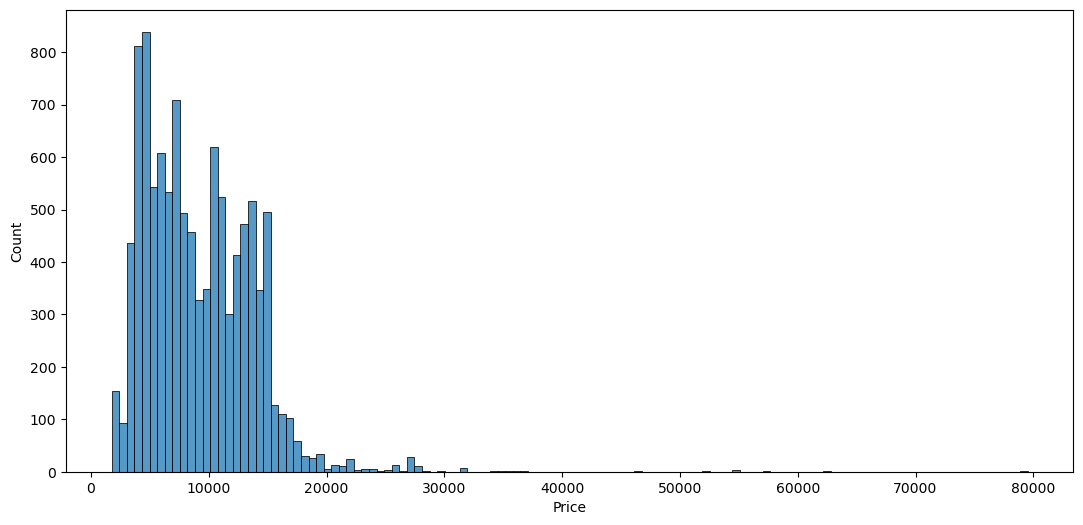

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(13,6))
sns.histplot(df['Price'])

The flight prices are mostly in range of 1800 to 20000. There's also some flight price which are too high and can be looked as outliers in the dataset.

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
df['Price'].min() # Minimum Price

1759

In [6]:
df['Price'].max() # Maximum price

79512

In [7]:
df['Price'].max() - df['Price'].min() # range

77753

Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

<AxesSubplot: xlabel='Airline', ylabel='Price'>

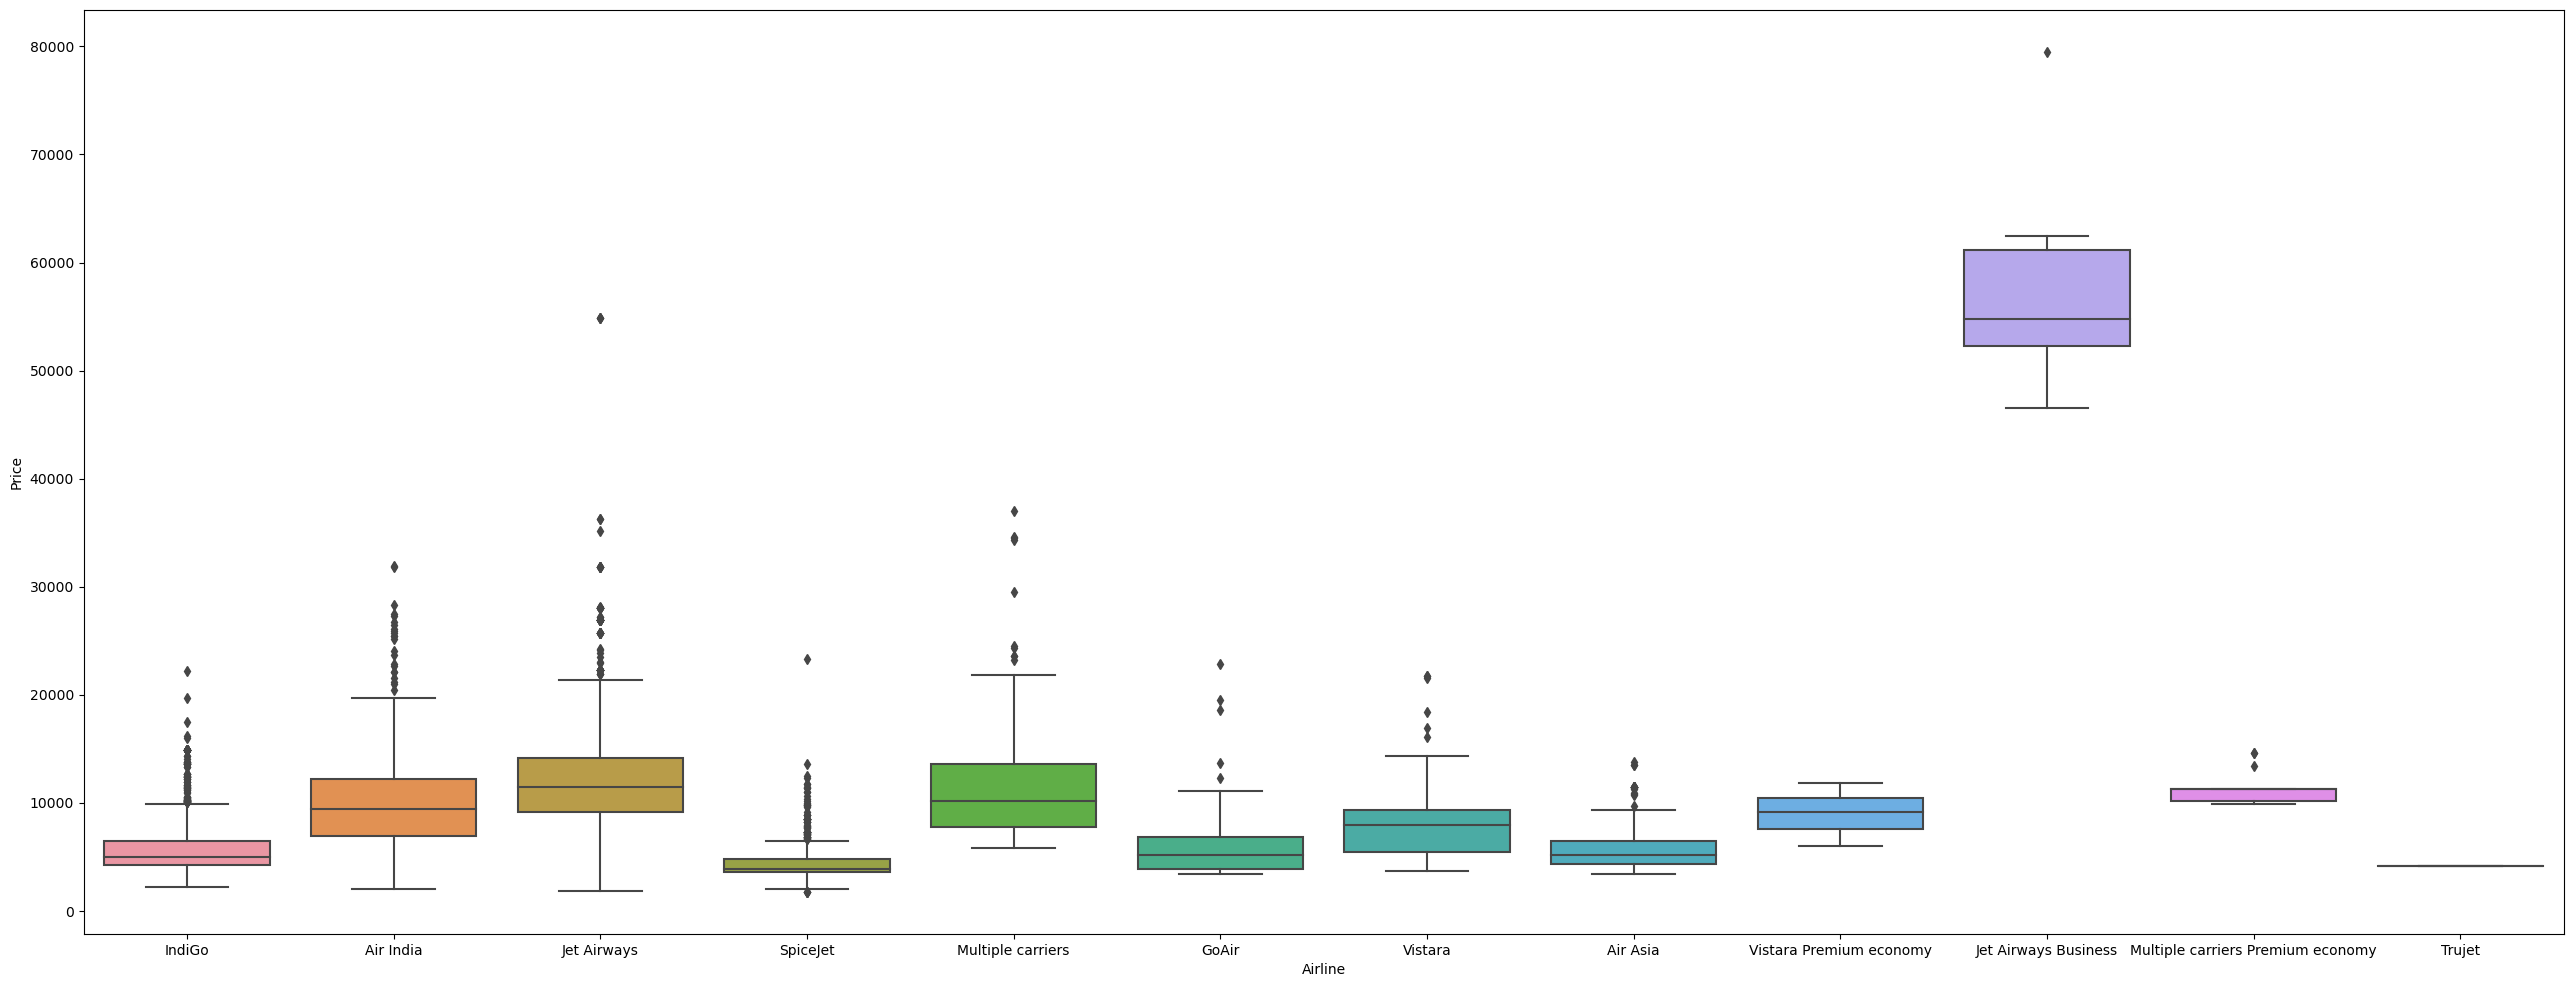

In [8]:
plt.subplots(figsize=(32,12))
sns.boxplot(data=df, x='Airline',y='Price')

Observations:

- Jet Airways Business has highest flight prices.
- Indigo, Spicejet and Trujet has lowest prices.
    

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

There's huge number of outlier in the dataset. 

<AxesSubplot: >

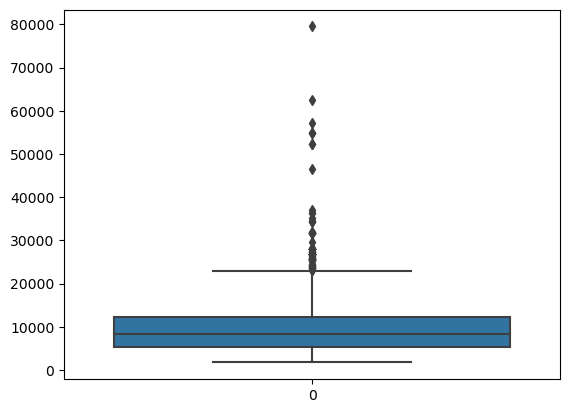

In [9]:
sns.boxplot(df['Price'])

Potential outliers can have a significant impact on your analysis because they can skew your results or make it difficult to draw meaningful conclusions.

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

To identify the peak travel season from the Flight Price dataset, there are several features that you can analyze. Here are some potential features to consider:

1. Date: Analyzing the flight prices by date can help identify when prices tend to be highest or lowest.

2. Destination: Analyzing the flight prices by destination can help identify when certain destinations are more popular and therefore have higher prices.

3. Airline: Analyzing the flight prices by airline can help identify which airlines are more popular during certain seasons.

4. Travel duration: Analyzing the flight prices by travel duration can help identify which times of year people are more likely to take longer or shorter trips.

To present your findings to your boss. Here are some potential options:

1. Line graph: You can create a line graph that shows the average flight prices over time, by month or week. This can help identify the peak travel season when prices are highest.

2. Heat map: You can create a heat map that shows the average flight prices by month or week and destination. This can help identify which destinations are most popular during certain seasons.

3. Bar chart: You can create a bar chart that shows the number of flights or passengers by airline and month or week. This can help identify which airlines are more popular during certain seasons.

4. Scatter plot: You can create a scatter plot that shows the relationship between flight price and travel duration, by month or week. This can help identify which times of year people are more likely to take longer or shorter trips.

In [12]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [15]:
#extracting month from date of journey and adding month column to df
df['month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int) 

In [16]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6


<AxesSubplot: xlabel='month', ylabel='Count'>

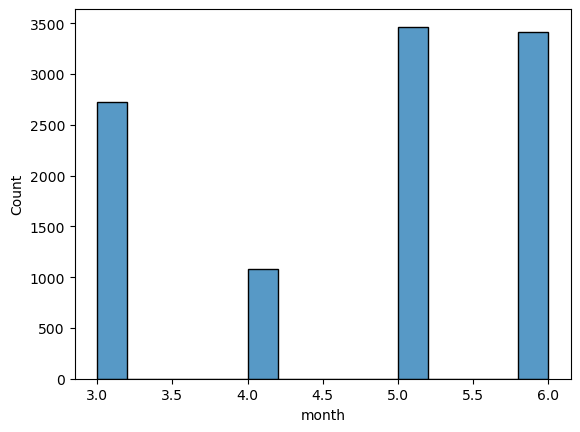

In [18]:
sns.histplot(df['month'])

May and June months witnessed peak amount of travel.

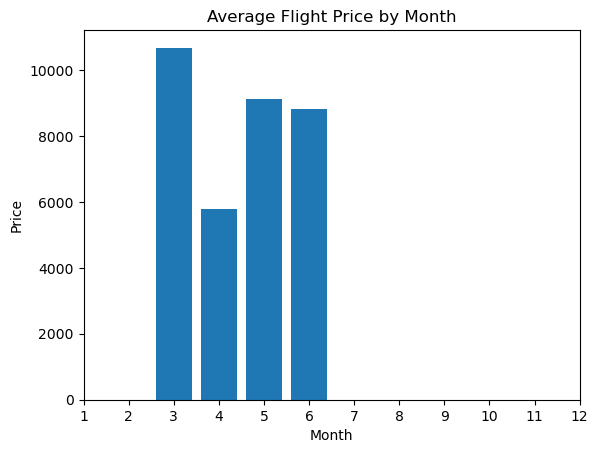

In [29]:
grouped_data = df.groupby('month')['Price'].mean()

plt.bar(grouped_data.index, grouped_data.values)
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(range(1, 13))
plt.show()

In the peak months i.e. May and June, average price is approx. 9000.

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

Some of the key features I would consider include:

1. Time: I would analyze flight prices over time, looking at trends over the course of weeks, months, and even years. This would help me identify seasonal trends, as well as longer-term trends in flight prices.

2. Airlines: I would analyze flight prices by airline, looking at how prices vary between different carriers. This would help me identify any pricing strategies that airlines may be using, and could also help me identify which airlines are generally more expensive or more affordable.

3. Routes: I would analyze flight prices by route, looking at how prices vary between different destinations. This would help me identify which destinations are generally more expensive or more affordable, as well as any seasonal trends in pricing.

4. Other factors: I would also consider other factors that could impact flight prices, such as the day of the week, time of day, and length of the flight.

To present my findings to my team, I would use a variety of visualizations, including:

1. Line graphs: I would use line graphs to show trends in flight prices over time. This would allow me to easily visualize seasonal trends, as well as longer-term trends in pricing.

2. Bar charts: I would use bar charts to compare flight prices between different airlines, routes, or other factors. This would allow me to easily identify which airlines, routes, or other factors are generally more expensive or more affordable.

3. Heat maps: I would use heat maps to visualize flight prices by day of the week, time of day, or other factors. This would allow me to easily identify patterns in pricing that may be related to specific times or days.

4. Scatter plots: I would use scatter plots to visualize the relationship between different factors and flight prices. For example, I could use a scatter plot to show the relationship between flight duration and price.

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

Features I would look into are:

1. Date and Time of Flight: Analyzing the time of day, day of the week, and seasonality of flights can provide insight into the pricing strategies of airlines. For instance, flights during peak travel times may have higher prices due to increased demand.

2. Route and Destination: The origin and destination of a flight can impact its price. For instance, longer routes and international destinations tend to have higher prices.

3. Airline: Different airlines may have different pricing strategies based on factors such as their target market, brand image, and competition. Analyzing the prices of different airlines on the same route can help identify the impact of the airline on flight prices.

5. Flight Duration: Longer flight durations may have higher prices due to factors such as fuel costs and crew salaries.

6. Seasonal Trends: Seasonal trends in flight prices can be affected by factors such as holidays, events, and weather conditions.

I would use a combination of visualizations such as scatterplots, line graphs, and heat maps to present my findings to the management team. These visualizations would help to illustrate the relationships between the different features and flight prices, allowing for a better understanding of the factors that impact pricing.

### Google Playstore:
Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
df.shape

(10841, 13)

Dataset has 10841 rows and 13 columns

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

In [63]:
df['Rating'].isnull().sum() #missing values

1474

Rating has null values. We are replacing them by mean imputation. Imputation is used to get good vizualisation here but, we need to consider several factors while replacing values for huge number of nan valies.

In [80]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [65]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [81]:
df.drop(index=10472,inplace=True) # dropping category 1.9

<AxesSubplot: xlabel='Rating', ylabel='Category'>

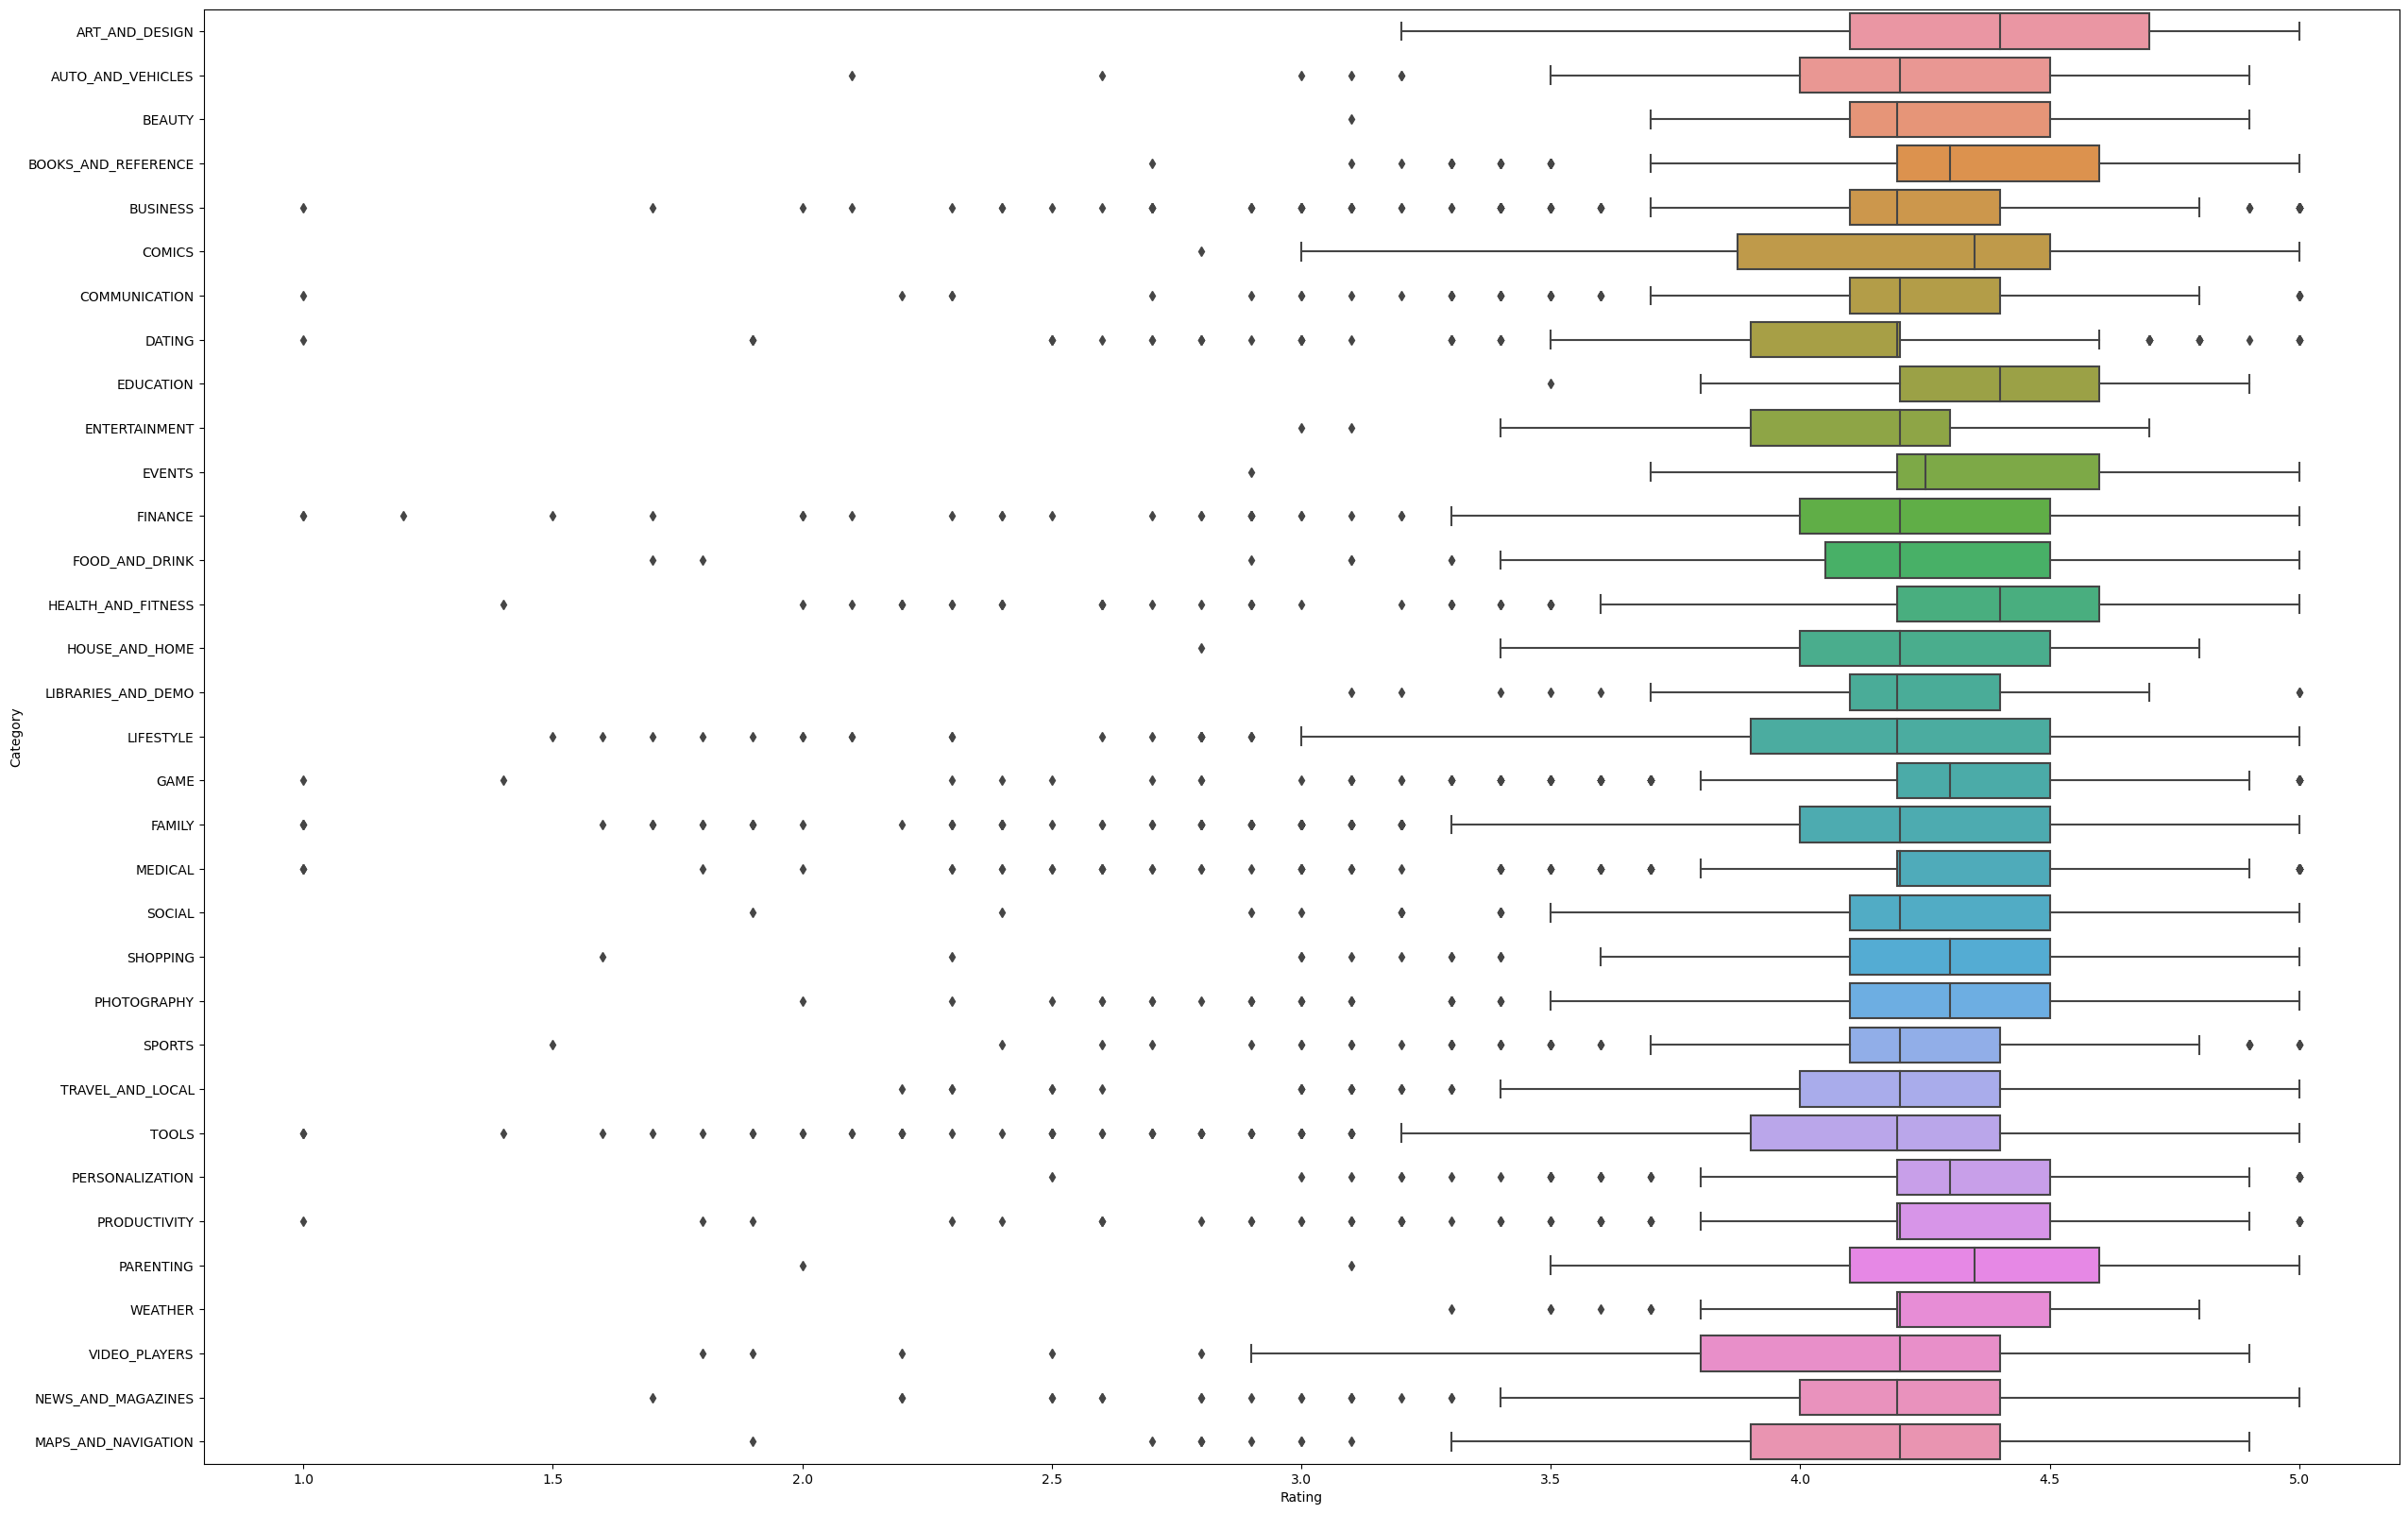

In [41]:
plt.subplots(figsize=(30,20))
sns.boxplot(data=df, x='Rating',y='Category')

- The apps in dataset mostly has a min avg rating of 3.
- There are many outliers which can skew the data for each categories.
- For many categories the mean rating is between 4 and 4.5.
- Lowest rating is observed for categories like productivity, tools, game, family, medical etc.
- Art and Design Category has more no of highest rating apps.

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

As observed above rating columns has missing values. This would lead to bias in the data.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [67]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [92]:
df.drop(df[df['Size'].str.contains('Varies with device')].index, inplace=True)

In [96]:
df['Size'] = df['Size'].apply(lambda x: float(x[:-1])/1000 if x.endswith('k') else x)

In [98]:
df['Size'] = df['Size'].str.strip('M').astype(float)

Text(0.5, 0, 'Size in MB')

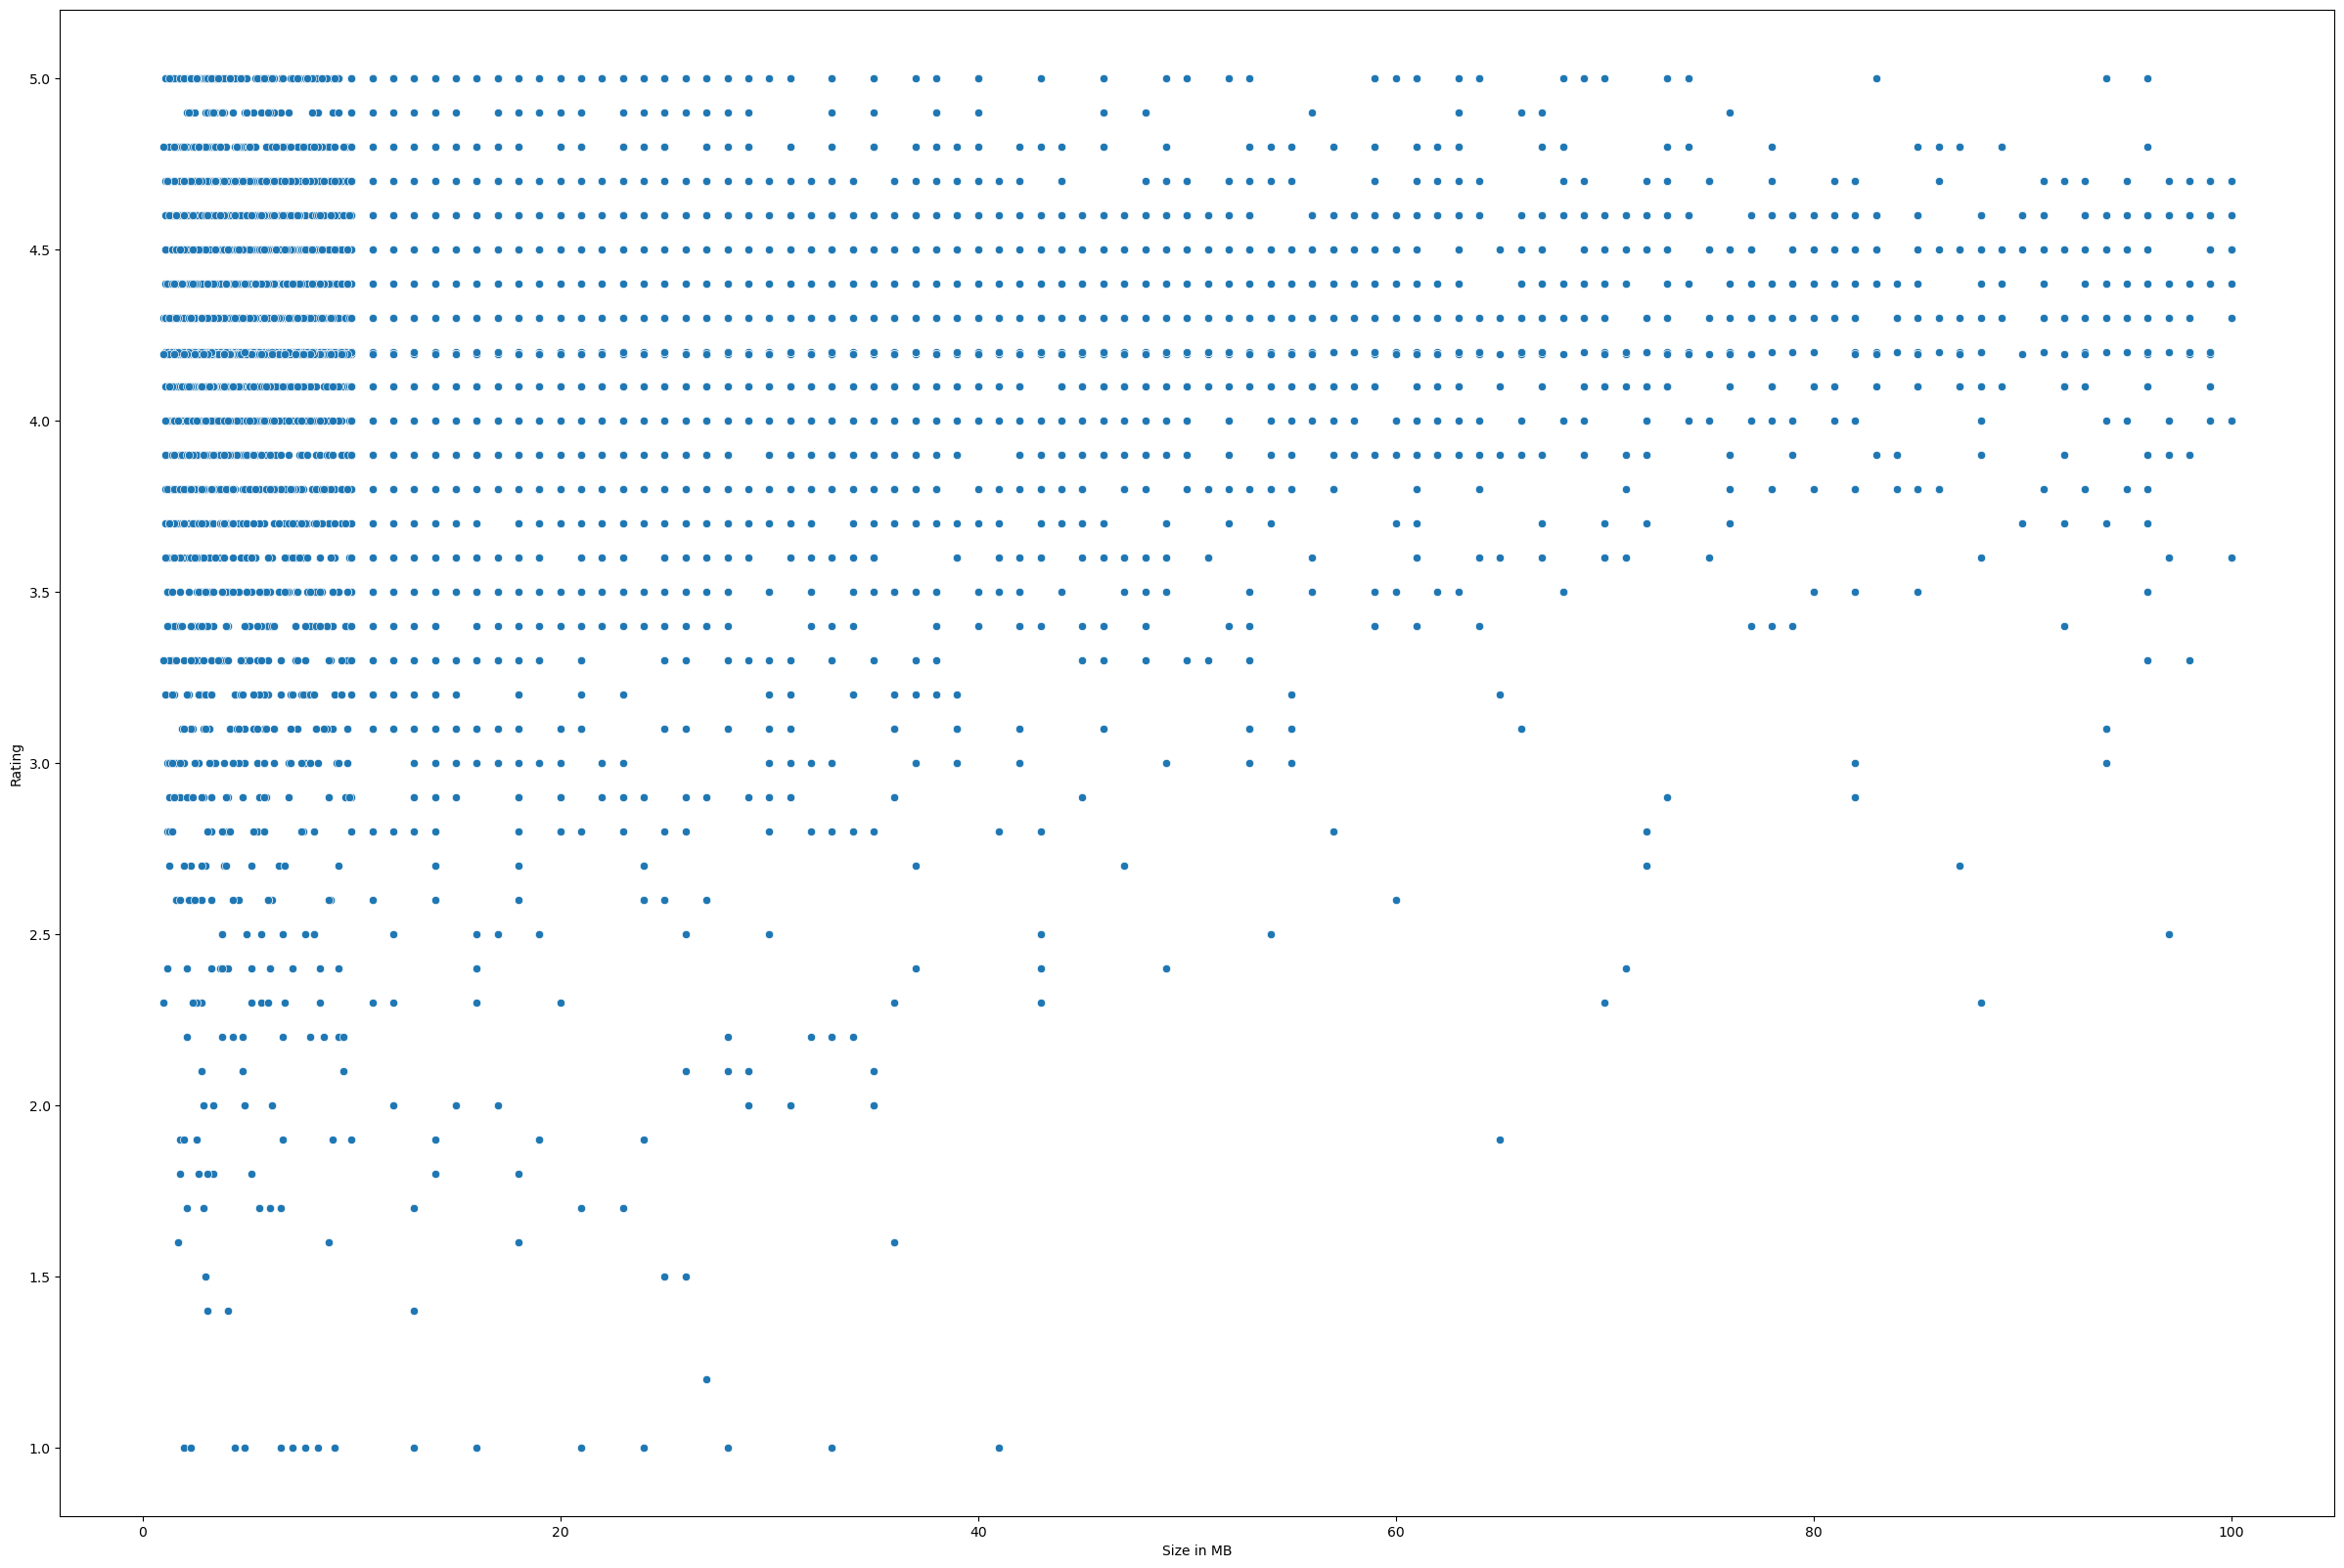

In [112]:
plt.subplots(figsize=(30,20))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.xlabel('Size in MB')

- The Highest Rating apps tend to have large size.
- The large number of apps with rating in range of 2.8 to 5 have a size in betwen 2MB to 15MB.

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [113]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [120]:
df['Price'].isnull().sum() # no missing values

0

In [121]:
df['App'].isnull().sum()

0

In [153]:
# Price has $ in it. Removing it and converting price to float type
df['Price'] = df['Price'].apply(lambda x: float(x.split('$')[1]) if x.startswith('$') else x).astype(float)

<AxesSubplot: xlabel='Type', ylabel='Price'>

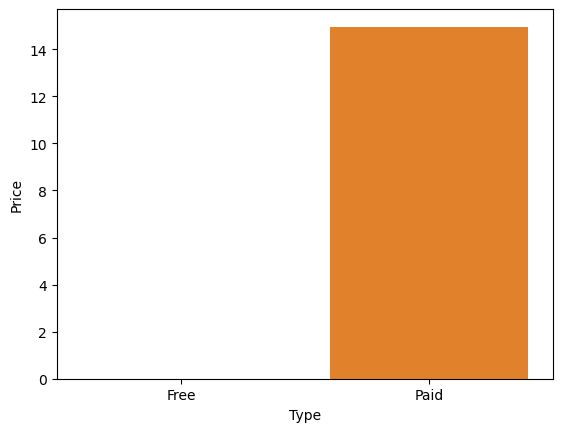

In [157]:
grouped_data = df.groupby('Type')['Price'].mean().reset_index()
sns.barplot(data = grouped_data, x='Type',y='Price')

<AxesSubplot: xlabel='Category', ylabel='Price'>

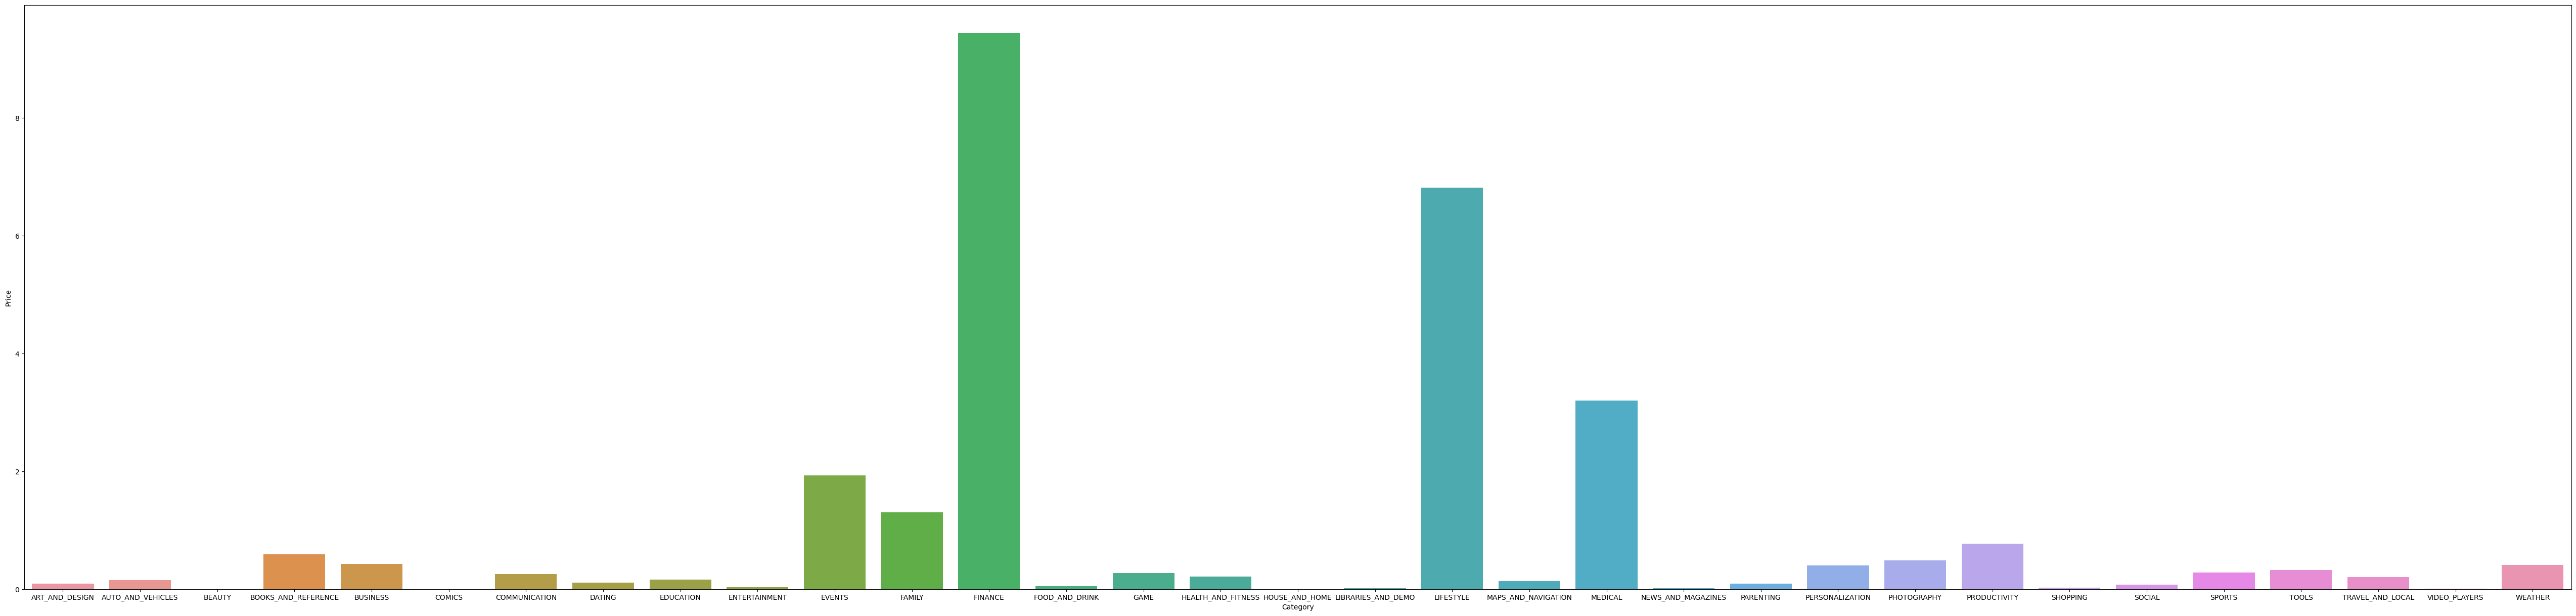

In [167]:
plt.subplots(figsize=(65,15))
grouped_data1 = df.groupby('Category')['Price'].mean().reset_index()
sns.barplot(data = grouped_data1, x='Category',y='Price')

- Finance apps charge more price.
- The Finance, Medical and Lifestyle apps has high avg price.
- More number of apps has avg price of less than $1

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [181]:
df['Installs'] = df['Installs'].str.strip('+')

In [185]:
df['Installs'] = df['Installs'].str.replace(',','').astype(int)

In [187]:
group_table = df.groupby('App')['Installs'].count()

# Then, sort the table in descending order to find the apps with the highest number of installs
freq_table = group_table.sort_values(ascending=False)

# Finally, print the top 10 apps by number of installs
print(freq_table.head(10))

App
ROBLOX              9
Candy Crush Saga    7
8 Ball Pool         7
Zombie Catchers     6
Bubble Shooter      6
Nick                6
Helix Jump          6
Subway Surfers      6
Temple Run 2        6
Skyscanner          5
Name: Installs, dtype: int64


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

- Import Dataset.
- Clean the Dataset.
- Analyse 
    - Installs vs Categories, which provide current trend of apps people are installing more.
    - Category vs Price, give info on how much people are paying for apps and also, which category apps will have a potential  to earn more.
    - Size vs Category, gives idea about variation in size of the apps for different category.
    - Category vs Rating, to understand quality of apps in particular category, it helps to understand whether our app can fulfill the gap if there's some.

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

- App vs Installs, which gives the apps with high installs. We can use heatmap for this as there's more number of apps.
- App vs Price, It can help us to understand avg price the developer makes. We can use barplot to understand this.
- App vs Size vs Installs, we can analyze how size is a factor in installing a app. We can use scatterplot for this.

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

- Installs vs Month, gives which months tend to have more installs w.r.to categories. We can use barplot.
- Reviews and Ratings vs Time, it provides us overview of the user engagement in different months. We can use scatterplot.